# SVM Model Testing

In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd

from numpy.random import default_rng
rng = default_rng()

### Import dataset

In [2]:
images = []
labels = []
reshp = lambda image : cv.resize(image,(500,500))
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/good/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
    for _ in range(30):
        M = np.float32([[1, 0, rng.standard_normal(1)[0]*400],
                    [0, 1, rng.standard_normal(1)[0]*400]])
        (h, w) = im.shape[:2]
        shifted = cv.warpAffine(im, M, (w, h))
        im = reshp(im)
        images.append(im)
        labels.append(1)
        
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/bad/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
    for _ in range(30):
        M = np.float32([[1, 0, rng.standard_normal(1)[0]*400],
                    [0, 1, rng.standard_normal(1)[0]*400]])
        (h, w) = im.shape[:2]
        shifted = cv.warpAffine(im, M, (w, h))
        im = reshp(im)
        images.append(im)
        labels.append(0)
    
images = np.array(images)
labels = np.array(labels)

In [3]:
print("{} images".format(len(images)))
print("Image shape {}".format(images.shape))

5670 images
Image shape (5670, 500, 500)


### Example Good and Bad Part

class 1


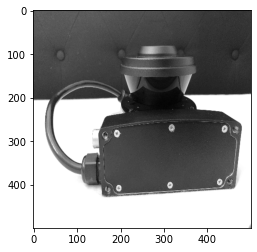

In [4]:
num = 0
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

class 1


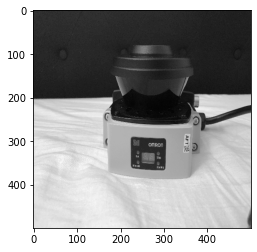

In [5]:
num = 172
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

## import model libraries

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle

### data pipeline

In [7]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=30,svd_solver="full")), ('svc', SVC())])

### training and testing split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.50)
print("Train shape {}".format(X_train.shape))
print("Test shape {}".format(X_test.shape))

Train shape (2835, 500, 500)
Test shape (2835, 500, 500)


In [9]:
pipe.fit(X_train.reshape(X_train.shape[0],-1),y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=30, svd_solver='full')),
                ('svc', SVC())])

In [10]:
# load pipeline
#with open('../model.pkl','rb') as file:
#    pipe = pickle.load(file)

In [11]:
# save pipeline
#with open('../model.pkl','wb') as file:
#    pickle.dump(pipe,file)

In [12]:
# training set
pipe.score(X_train.reshape(X_train.shape[0],-1),y_train)

1.0

In [13]:
# testing set
pipe.score(X_test.reshape(X_test.shape[0],-1),y_test)

1.0

In [14]:
conf = np.zeros((2,2))
for i,im in enumerate(X_test):
    conf[y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]] += 1

Text(0.5, 15.0, 'prediction')

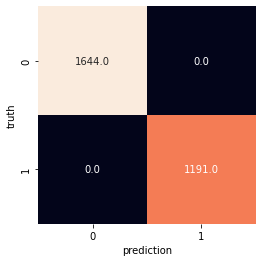

In [15]:
sns.heatmap(conf, annot=True, fmt="", cbar=False, square=True)
plt.ylabel('truth')
plt.xlabel('prediction')

In [16]:
count = 0
for i, v in enumerate(pipe.predict(X_test.reshape(X_test.shape[0],-1))==y_test):
    if v==False and count < 5:
        count += 1
        plt.imshow(images[i],cmap='gray')
        plt.title("truth {} prediction {}".format(y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]))
        plt.show()

### inverse transform visualization

In [78]:
test1 = X_train[0:1]
test2 = pipe[0].inverse_transform(pipe[1].inverse_transform(pipe[1].transform(pipe[0].transform(X_train[0:1].reshape(1,-1))))).reshape(1,500,500)

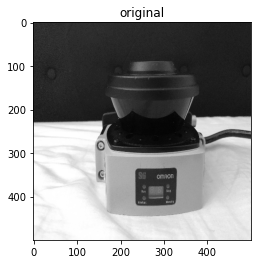

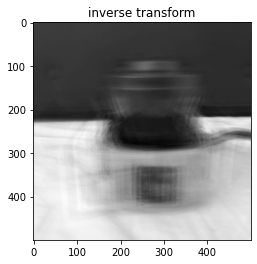

In [79]:
plt.imshow(test1[0],cmap='gray')
plt.title('original')
plt.show()
plt.imshow(test2[0],cmap='gray')
plt.title('inverse transform')
plt.show()